<a href="https://colab.research.google.com/github/ardioputra/implementasi-IDG/blob/main/IDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-01-18 06:10:08--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-01-18 06:10:09--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   169MB/s    in 

In [2]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Queen', 'Pawn', 'Bishop', 'Knight', 'King']

In [7]:
print('total pawn images :',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total king images :',len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total knight images :',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total king images : 76
total knight images : 106


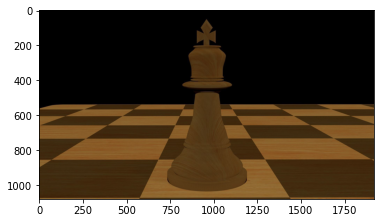

In [8]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)

In [11]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              batch_size = 8,
                                              class_mode = 'categorical',
                                              subset = 'training')

val_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              batch_size = 8,
                                              class_mode = 'categorical',
                                              subset = 'validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [12]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [13]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
hist = model.fit(train_gen,
                 validation_data = val_gen,
                 epochs=50,
                 verbose=2)

Epoch 1/50
63/63 - 35s - loss: 1.8788 - accuracy: 0.1563 - val_loss: 1.7888 - val_accuracy: 0.1923 - 35s/epoch - 552ms/step
Epoch 2/50
63/63 - 33s - loss: 1.7898 - accuracy: 0.1944 - val_loss: 1.7853 - val_accuracy: 0.1923 - 33s/epoch - 528ms/step
Epoch 3/50
63/63 - 33s - loss: 1.7887 - accuracy: 0.1824 - val_loss: 1.7836 - val_accuracy: 0.1538 - 33s/epoch - 526ms/step
Epoch 4/50
63/63 - 33s - loss: 1.7888 - accuracy: 0.1864 - val_loss: 1.7815 - val_accuracy: 0.1923 - 33s/epoch - 528ms/step
Epoch 5/50
63/63 - 33s - loss: 1.7845 - accuracy: 0.1904 - val_loss: 1.7806 - val_accuracy: 0.1923 - 33s/epoch - 524ms/step
Epoch 6/50
63/63 - 33s - loss: 1.7838 - accuracy: 0.1864 - val_loss: 1.7796 - val_accuracy: 0.1923 - 33s/epoch - 522ms/step
Epoch 7/50
63/63 - 33s - loss: 1.7835 - accuracy: 0.1944 - val_loss: 1.7794 - val_accuracy: 0.1731 - 33s/epoch - 523ms/step
Epoch 8/50
63/63 - 33s - loss: 1.7810 - accuracy: 0.1904 - val_loss: 1.7767 - val_accuracy: 0.2885 - 33s/epoch - 524ms/step
Epoch 9/

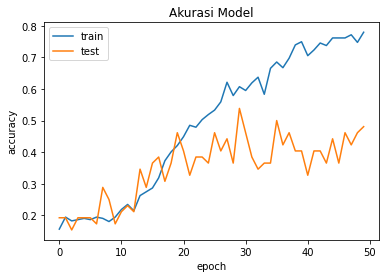

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

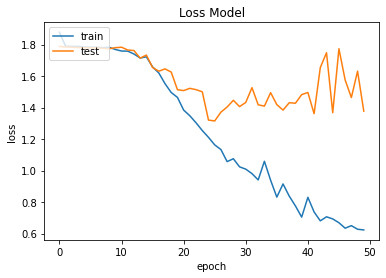

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()